# Importing the dataset into a dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

import seaborn as sns

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import sklearn.model_selection as ms
import sklearn.preprocessing as preprocess
from sklearn.model_selection import train_test_split


In [2]:
# !pip install pyarabic
# !pip install langdetect
# !pip install nltk

# from langdetect import detect
# import pyarabic.araby as araby
# nltk.download("all")


In [3]:
dataset_folder_path="/home/youssef/AUC/Spring22/CSCE493002 - Machine Learning/project/datasets"
df = pd.read_csv(dataset_folder_path+'/freqEncoded.csv')
df.head()

,label,text,stemmed_text,normalized,clean_text,freq
0,1,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...,متز نوع ما . نظف وقع جهز شاطيء . طعم,متز نوع ما . نظف وقع جهز شاطيء . طعم,"['متز', 'نوع', 'ما', 'نظف', 'وقع', 'جهز', 'شاط...","{'متز': 1, 'نوع': 1, 'ما': 1, 'نظف': 1, 'وقع':..."
1,1,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...,احد سبب نجح امر ان كل شخص في هذه دول عشق ترب ....,احد سبب نجح امر ان كل شخص في هذه دول عشق ترب ....,"['احد', 'سبب', 'نجح', 'امر', 'كل', 'شخص', 'هذه...","{'احد': 1, 'سبب': 1, 'نجح': 1, 'امر': 2, 'كل':..."
2,1,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...,هدف .. وقي . نقل من صخب شرع قهر الى هدء جبل شي...,هدف .. وقي . نقل من صخب شرع قهر الى هدء جبل شي...,"['هدف', 'نقل', 'صخب', 'شرع', 'قهر', 'هدء', 'جب...","{'هدف': 1, 'نقل': 1, 'صخب': 1, 'شرع': 1, 'قهر'..."
3,1,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...,خلص .. بدئ الل مست بهر زي فيل زرق ميقراش حسن.....,خلص .. بدء الل مست بهر زي فيل زرق ميقراش حسن.....,"['خلص', 'بدء', 'الل', 'بهر', 'زي', 'فيل', 'زرق...","{'خلص': 3, 'بدء': 1, 'الل': 1, 'بهر': 1, 'زي':..."
4,1,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...,ياس جلر جزء لا جزأ من دبي . ندق كامل خدم ريح ن...,ياس جلر جزء لا جزء من دبي . ندق كامل خدم ريح ن...,"['ياس', 'جزء', 'لا', 'جزء', 'دبي', 'ندق', 'كام...","{'ياس': 1, 'جزء': 2, 'لا': 2, 'دبي': 1, 'ندق':..."


### Drop unecessary columns and neutral label

In [4]:
df.drop(["text","stemmed_text","normalized","clean_text"],axis=1,inplace=True)

In [5]:
df_copy=df[(df['label']!= 0)]

In [6]:
df_copy.reset_index(inplace=True,drop=True)
df_copy

,label,freq
0,1,"{'متز': 1, 'نوع': 1, 'ما': 1, 'نظف': 1, 'وقع':..."
1,1,"{'احد': 1, 'سبب': 1, 'نجح': 1, 'امر': 2, 'كل':..."
2,1,"{'هدف': 1, 'نقل': 1, 'صخب': 1, 'شرع': 1, 'قهر'..."
3,1,"{'خلص': 3, 'بدء': 1, 'الل': 1, 'بهر': 1, 'زي':..."
4,1,"{'ياس': 1, 'جزء': 2, 'لا': 2, 'دبي': 1, 'ندق':..."
...,...,...
66661,-1,"{'عرفش': 1, 'ليه': 1, 'كنت': 1, 'كمل': 1, 'وهي..."
66662,-1,"{'لا': 3, 'سحق': 1, 'يكون': 1, 'كنق': 1, 'لنه'..."
66663,-1,"{'ضعف': 1, 'جدا': 1, 'ولم': 1, 'متع': 1, 'به':..."
66664,-1,"{'ملة': 1, 'جدا': 1, 'حمد': 1, 'حسن': 1, 'علو'..."


In [7]:
dfN=df_copy

# Unique Dictionary

In [8]:


def get_unique(df,colname):
  sentences_arr=df[colname].to_numpy() #convert df to np array
  words=' '.join(sentences_arr).split(' ') # join all strings into one string then splitting to get the words
  words=np.array(words) #convert to np array
  unique,counts = np.unique(words,return_counts=True)
  return unique, counts

def get_unique_dict(unique,counts):
  unique_dict=dict(zip(unique,counts))
  unique_dict=dict(sorted(unique_dict.items(), key=lambda item: item[1],reverse=True))
  return unique_dict
def remove_redundant_words(unique_dict):
  stop_words=['من','على','عن','في','فى','و','ان','هذا','او','كتب','...','.','','الى','فيه','انه','قبل','//','..','،',':',"؟",'/']
  for k, v in list(unique_dict.items()):
      if(unique_dict[k]<100 or k in stop_words):
        del unique_dict[k]

  return unique_dict



In [9]:
#df_copy= pd.read_csv('freqEncoded.csv')
#unique,counts=get_unique(df_copy,"normalized")
unique,counts=get_unique(dfN,"freq")
unique_dict=get_unique_dict(unique,counts)
unique_dict=remove_redundant_words(unique_dict)

In [10]:
print("There are %d Unique words:"%len(unique_dict))
unique_dict

There are 2838 Unique words:


{'1,': 1724707,
 '2,': 254179,
 '3,': 66119,
 '1}': 65678,
 '4,': 24199,
 "'جدا':": 16799,
 "'لا':": 16265,
 "'ما':": 13117,
 "'كان':": 12325,
 "'كثر':": 11793,
 "'كل':": 11732,
 "'قرء':": 11569,
 "'وجد':": 11393,
 "'عمل':": 11385,
 "'لم':": 11313,
 "'وقع':": 10642,
 '5,': 10607,
 "'غير':": 10025,
 "'ندق':": 9294,
 "'بعد':": 9224,
 "'غرف':": 9145,
 "'جمل':": 8904,
 "'روي':": 8738,
 "'لكن':": 8616,
 "'مع':": 8561,
 "'حدث':": 8098,
 "'خدم':": 8077,
 "'نظف':": 7907,
 "'نفس':": 7907,
 "'علم':": 7804,
 "'جمع':": 7229,
 "'التي':": 7228,
 "'الل':": 7046,
 "'هو':": 6993,
 "'فكر':": 6918,
 "'شخص':": 6779,
 "'وحد':": 6686,
 "'قرب':": 6616,
 "'بعض':": 6601,
 "'عجب':": 6543,
 "'ولا':": 6436,
 "'كانت':": 6341,
 "'شكل':": 6282,
 "'عند':": 6199,
 "'كلم':": 6178,
 "'عرف':": 6123,
 "'اخر':": 5959,
 "'رءع':": 5934,
 "'حتى':": 5912,
 "'الا':": 5863,
 "'شيء':": 5851,
 "'قدم':": 5827,
 "'دخل':": 5779,
 "'بين':": 5671,
 "'هذه':": 5606,
 "'شعر':": 5586,
 '6,': 5534,
 "'سلب':": 5350,
 "'نظر':": 5258,
 "'الذي'

In [11]:
dfN

,label,freq
0,1,"{'متز': 1, 'نوع': 1, 'ما': 1, 'نظف': 1, 'وقع':..."
1,1,"{'احد': 1, 'سبب': 1, 'نجح': 1, 'امر': 2, 'كل':..."
2,1,"{'هدف': 1, 'نقل': 1, 'صخب': 1, 'شرع': 1, 'قهر'..."
3,1,"{'خلص': 3, 'بدء': 1, 'الل': 1, 'بهر': 1, 'زي':..."
4,1,"{'ياس': 1, 'جزء': 2, 'لا': 2, 'دبي': 1, 'ندق':..."
...,...,...
66661,-1,"{'عرفش': 1, 'ليه': 1, 'كنت': 1, 'كمل': 1, 'وهي..."
66662,-1,"{'لا': 3, 'سحق': 1, 'يكون': 1, 'كنق': 1, 'لنه'..."
66663,-1,"{'ضعف': 1, 'جدا': 1, 'ولم': 1, 'متع': 1, 'به':..."
66664,-1,"{'ملة': 1, 'جدا': 1, 'حمد': 1, 'حسن': 1, 'علو'..."


# TF-IDF

In [12]:
import ast
#converting string dict to dict
dfN['freq']=dfN['freq'].apply(lambda x: ast.literal_eval(x))
print(type(dfN.head()["freq"][0]))

<class 'dict'>


/home/youssef/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [13]:
#joined words into a sentence again to use sklearn model

dfN["text"]=dfN["freq"].apply(lambda freq_dict: ' '.join(list(freq_dict.keys())) )
dfN

,label,freq,text
0,1,"{'متز': 1, 'نوع': 1, 'ما': 1, 'نظف': 1, 'وقع':...",متز نوع ما نظف وقع جهز شاطيء طعم
1,1,"{'احد': 1, 'سبب': 1, 'نجح': 1, 'امر': 2, 'كل':...",احد سبب نجح امر كل شخص هذه دول عشق ترب نحن نحب...
2,1,"{'هدف': 1, 'نقل': 1, 'صخب': 1, 'شرع': 1, 'قهر'...",هدف نقل صخب شرع قهر هدء جبل شيش عرف حقق ما جرى...
3,1,"{'خلص': 3, 'بدء': 1, 'الل': 1, 'بهر': 1, 'زي':...",خلص بدء الل بهر زي فيل زرق حمد راد خطى رحل قرء...
4,1,"{'ياس': 1, 'جزء': 2, 'لا': 2, 'دبي': 1, 'ندق':...",ياس جزء لا دبي ندق كامل خدم ريح نفس وجد
...,...,...,...
66661,-1,"{'عرفش': 1, 'ليه': 1, 'كنت': 1, 'كمل': 1, 'وهي...",عرفش ليه كنت كمل وهي مش عجب حدث بطء ممل روي اط...
66662,-1,"{'لا': 3, 'سحق': 1, 'يكون': 1, 'كنق': 1, 'لنه'...",لا سحق يكون كنق لنه سيء شي وجد خدم فطر صبح ستي...
66663,-1,"{'ضعف': 1, 'جدا': 1, 'ولم': 1, 'متع': 1, 'به':...",ضعف جدا ولم متع به كل قصه سرد لحل شهد بدن فكر
66664,-1,"{'ملة': 1, 'جدا': 1, 'حمد': 1, 'حسن': 1, 'علو'...",ملة جدا حمد حسن علو فنن وصف عند دقق حد ثني قرء...


In [14]:
#Splitting data
X_train,X_test,Y_train, Y_test = train_test_split(dfN['text'], dfN['label'], test_size=0.3, random_state=1)
print("Train: " ,X_train.shape,Y_train.shape,"Test: ",(X_test.shape,Y_test.shape))

Train:  (46666,) (46666,) Test:  ((20000,), (20000,))


# TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

In [16]:
print(tf_x_train[1000])

  (0, 3054)	0.399087852883007
  (0, 530)	0.34295341672047236
  (0, 1238)	0.3213888542967605
  (0, 3274)	0.27977113661028613
  (0, 3322)	0.3532507371589668
  (0, 2397)	0.3197743819705713
  (0, 3140)	0.23655315983481154
  (0, 1253)	0.19516641960193287
  (0, 1683)	0.3833121697914325
  (0, 3361)	0.17187081033107315
  (0, 2709)	0.15743661547652255
  (0, 2717)	0.1385857309095193


# Models Comparison

### Imports

In [17]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
#SVM
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
#NN
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
import sklearn.model_selection as modsel
from sklearn.model_selection import GridSearchCV

In [18]:
scoring = ['precision_macro', 'recall_macro','f1_macro','accuracy'] #used for CV

In [19]:
def convert_scores_to_df(scores):
    df=pd.DataFrame(scores)
    df.drop(columns=['fit_time','score_time'],inplace=True)
    return df
def display_heatmap(y_test,pred):
    matrix=confusion_matrix(y_test,pred)
    sns.heatmap(matrix,annot=True)
def print_cv_scores(scores):
    scores_df=convert_scores_to_df(scores)
    print(scores_df)
    print("Means:-\n",scores_df.mean())

## Decision Tree

In [91]:
DT_clf = DecisionTreeClassifier(random_state=0).fit(tf_x_train, Y_train)
DT_pred = DT_clf.predict(tf_x_test)

In [92]:
print(classification_report(Y_test, DT_pred))

              precision    recall  f1-score   support

          -1       0.73      0.74      0.74      9823
           1       0.75      0.74      0.74     10177

    accuracy                           0.74     20000
   macro avg       0.74      0.74      0.74     20000
weighted avg       0.74      0.74      0.74     20000



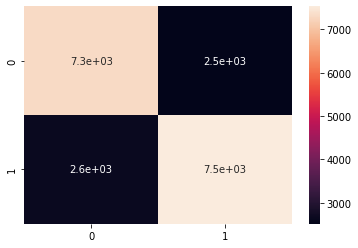

In [93]:
display_heatmap(Y_test,DT_pred)

## Naive Bayes

In [94]:
NV_clf = GaussianNB().fit(tf_x_train.toarray(), Y_train)
NV_pred = NV_clf.predict(tf_x_test.toarray())


In [95]:
print(classification_report(Y_test, NV_pred))

              precision    recall  f1-score   support

          -1       0.73      0.73      0.73      9823
           1       0.74      0.73      0.74     10177

    accuracy                           0.73     20000
   macro avg       0.73      0.73      0.73     20000
weighted avg       0.73      0.73      0.73     20000



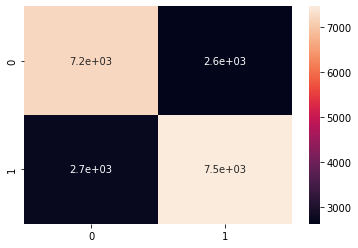

In [96]:
display_heatmap(Y_test, NV_pred)

## Logistic Regression

### Logistic Regression: newton-cg Solver

In [97]:
LogRegNewton = LogisticRegression(random_state=1, max_iter=10000,solver='newton-cg',C=50).fit(tf_x_train,Y_train)


In [98]:
LogRegNewtonPred = Logreg.predict(tf_x_test)
print(classification_report(Y_test, LogRegNewtonPred))

              precision    recall  f1-score   support

          -1       0.83      0.83      0.83      9823
           1       0.84      0.84      0.84     10177

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000



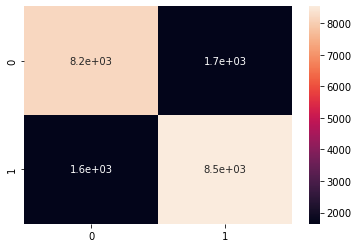

In [99]:
display_heatmap(Y_test, LogRegNewtonPred)

####  cross validation 

In [100]:
LR_newton_scores = modsel.cross_validate(LogRegNewton, tf_x_train, Y_train,cv=10, scoring=scoring,n_jobs=6)

In [101]:
print_cv_scores(LR_newton_scores)

   test_precision_macro  test_recall_macro  test_f1_macro  test_accuracy
0              0.829499           0.829492       0.829441       0.829441
1              0.819145           0.819155       0.819149       0.819156
2              0.823237           0.823193       0.823207       0.823227
3              0.829031           0.828974       0.828990       0.829012
4              0.828800           0.828819       0.828796       0.828798
5              0.833323           0.833256       0.833274       0.833298
6              0.823049           0.822908       0.822935       0.822975
7              0.825554           0.825573       0.825545       0.825547
8              0.828324           0.828341       0.828328       0.828333
9              0.828973           0.828952       0.828960       0.828976
Means:-
 test_precision_macro    0.826894
test_recall_macro       0.826866
test_f1_macro           0.826862
test_accuracy           0.826876
dtype: float64


### Logistic Regrsession: Saga Solver


In [102]:
LR_Saga = LogisticRegression(random_state=1, max_iter=10000,solver='saga',C=50).fit(tf_x_train,Y_train)
LR_Saga.fit(tf_x_train,Y_train)
LR_Saga_Pred=LogregSaga.predict(tf_x_test)

In [103]:
print(classification_report(Y_test, LR_Saga_Pred))

              precision    recall  f1-score   support

          -1       0.83      0.83      0.83      9823
           1       0.84      0.84      0.84     10177

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000



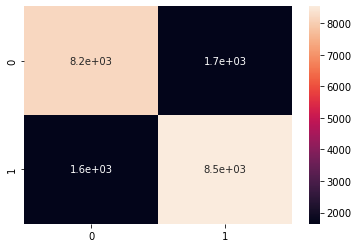

In [104]:
display_heatmap(Y_test, LR_Saga_Pred)

#### Cross Validation

In [105]:
LR_saga_scores = modsel.cross_validate(LR_Saga, tf_x_train, Y_train,cv=10, scoring=scoring,n_jobs=6)

In [106]:
print_cv_scores(LR_saga_scores)

   test_precision_macro  test_recall_macro  test_f1_macro  test_accuracy
0              0.829499           0.829492       0.829441       0.829441
1              0.819145           0.819155       0.819149       0.819156
2              0.823237           0.823193       0.823207       0.823227
3              0.829031           0.828974       0.828990       0.829012
4              0.828800           0.828819       0.828796       0.828798
5              0.833323           0.833256       0.833274       0.833298
6              0.823049           0.822908       0.822935       0.822975
7              0.825554           0.825573       0.825545       0.825547
8              0.828324           0.828341       0.828328       0.828333
9              0.828758           0.828739       0.828747       0.828761
Means:-
 test_precision_macro    0.826872
test_recall_macro       0.826845
test_f1_macro           0.826841
test_accuracy           0.826855
dtype: float64


## Support vector machines 

In [107]:
SGD_SVM_clf = make_pipeline(StandardScaler(with_mean=False), SGDClassifier(max_iter=500, tol=1e-3,))

In [108]:
SGD_SVM_clf.fit(tf_x_train, Y_train)
SGD_SVM_pred = SGD_SVM_clf.predict(tf_x_test)
print(classification_report(Y_test, SGD_SVM_pred))

              precision    recall  f1-score   support

          -1       0.81      0.79      0.80      9823
           1       0.80      0.82      0.81     10177

    accuracy                           0.81     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.81      0.81      0.81     20000



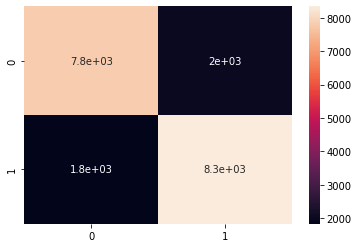

In [109]:
display_heatmap(Y_test, SGD_SVM_pred)

#### Cross Validation

In [110]:
SVM_scores = modsel.cross_validate(SGD_SVM_clf, tf_x_train, Y_train,cv=10, scoring=scoring,n_jobs=6)
print_cv_scores(SVM_scores)

   test_precision_macro  test_recall_macro  test_f1_macro  test_accuracy
0              0.805125           0.805083       0.805012       0.805014
1              0.804020           0.804001       0.803942       0.803943
2              0.809954           0.809904       0.809919       0.809942
3              0.810864           0.810736       0.810759       0.810799
4              0.801696           0.801655       0.801584       0.801586
5              0.801365           0.801349       0.801355       0.801371
6              0.805207           0.805140       0.805157       0.805186
7              0.795994           0.795637       0.795661       0.795757
8              0.798120           0.797282       0.797281       0.797471
9              0.792747           0.792736       0.792740       0.792756
Means:-
 test_precision_macro    0.802509
test_recall_macro       0.802352
test_f1_macro           0.802341
test_accuracy           0.802382
dtype: float64


## Nerual Networks

In [20]:
NN_clf_stop = MLPClassifier(solver='sgd',random_state=1, max_iter=1000, hidden_layer_sizes=(3,5), tol=0.000001, early_stopping=True, learning_rate_init=0.01)


In [21]:
NN_clf_stop.fit(tf_x_train, Y_train)
NN_pred_stop = NN_clf_stop.predict(tf_x_test)
print(classification_report(Y_test, NN_pred_stop))

              precision    recall  f1-score   support

          -1       0.86      0.82      0.84      9823
           1       0.83      0.87      0.85     10177

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000



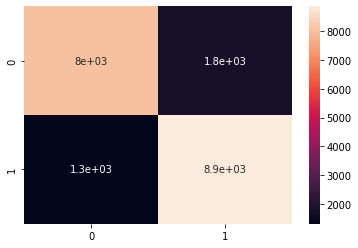

In [22]:
display_heatmap(Y_test, NN_pred_stop)

##### CV

In [23]:
NN_scores = modsel.cross_validate(NN_clf_stop, tf_x_train, Y_train,cv=10, scoring=scoring,n_jobs=6)
print_cv_scores(NN_scores)

   test_precision_macro  test_recall_macro  test_f1_macro  test_accuracy
0              0.835575           0.834855       0.834890       0.835012
1              0.835431           0.835444       0.835435       0.835440
2              0.840322           0.840238       0.840150       0.840154
3              0.836728           0.836607       0.836505       0.836512
4              0.835435           0.835454       0.835437       0.835440
5              0.837707           0.837506       0.837539       0.837583
6              0.836573           0.836406       0.836437       0.836477
7              0.832580           0.831093       0.831095       0.831333
8              0.846553           0.846524       0.846535       0.846550
9              0.840999           0.840938       0.840956       0.840977
Means:-
 test_precision_macro    0.837790
test_recall_macro       0.837506
test_f1_macro           0.837498
test_accuracy           0.837548
dtype: float64


### Grid search CV

In [ ]:

NN = MLPClassifier()
params = {'random_state':[1], 'max_iter': [1000], 'Hidden_layer_size': [(3,5)], 'early_stopping': ['True'], 'tol': [0.000001]}
grid = GridSearchCV(estimator = NN,  param_grid = params,  scoring = 'accuracy',   cv = 10,   verbose = 1,  n_jobs = -1)
grid.fit(tf_x_train,Y_train)
pred = grid.predict(tf_x_test)

print(classification_report(Y_test, pred))
"true"

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [26]:
NN_clf_stop = MLPClassifier(random_state=1, max_iter=30, hidden_layer_sizes=(16,16), tol=1e-5, early_stopping=True, learning_rate_init=0.01)
NN_clf_stop.fit(tf_x_train, Y_train)
NN_pred_stop = NN_clf_stop.predict(tf_x_test)
print(classification_report(Y_test, NN_pred_stop))

ERROR! Session/line number was not unique in database. History logging moved to new session 139
              precision    recall  f1-score   support

          -1       0.85      0.82      0.84      9823
           1       0.83      0.86      0.85     10177

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000



#### CV

In [116]:
NN_adam = MLPClassifier(solver='adam',random_state=1, max_iter=1000, hidden_layer_sizes=(3,5), tol=0.000001, early_stopping=True, learning_rate_init=0.01)
NN_adam_scores = modsel.cross_validate(NN_adam, tf_x_train, Y_train,cv=10, scoring=scoring,n_jobs=6)


In [117]:
print_cv_scores(NN_adam_scores)

   test_precision_macro  test_recall_macro  test_f1_macro  test_accuracy
0              0.839231           0.839162       0.839080       0.839083
1              0.831788           0.831803       0.831793       0.831798
2              0.832875           0.832840       0.832852       0.832869
3              0.834194           0.834107       0.834128       0.834155
4              0.831592           0.831609       0.831582       0.831583
5              0.838437           0.838421       0.838428       0.838440
6              0.832351           0.832105       0.831958       0.831976
7              0.829650           0.829660       0.829618       0.829619
8              0.839327           0.839204       0.839231       0.839263
9              0.837110           0.837126       0.837115       0.837120
Means:-
 test_precision_macro    0.834656
test_recall_macro       0.834604
test_f1_macro           0.834578
test_accuracy           0.834590
dtype: float64


In [118]:
NN_lbfgs = MLPClassifier(solver='lbfgs',random_state=1, max_iter=1000, hidden_layer_sizes=(3,5), tol=0.000001, early_stopping=True, learning_rate_init=0.01)
NN_lbfgs_scores = modsel.cross_validate(NN_lbfgs, tf_x_train, Y_train,cv=10, scoring=scoring,n_jobs=6)

In [119]:
print_cv_scores(NN_lbfgs_scores)

   test_precision_macro  test_recall_macro  test_f1_macro  test_accuracy
0              0.827323           0.827008       0.826844       0.826870
1              0.793612           0.793084       0.793097       0.793229
2              0.806779           0.806669       0.806691       0.806728
3              0.815077           0.815092       0.815080       0.815085
4              0.797503           0.797501       0.797502       0.797514
5              0.815589           0.815447       0.815472       0.815513
6              0.821892           0.821901       0.821895       0.821903
7              0.816129           0.816145       0.816115       0.816117
8              0.814720           0.814538       0.814566       0.814616
9              0.795949           0.794931       0.794549       0.794685
Means:-
 test_precision_macro    0.810457
test_recall_macro       0.810231
test_f1_macro           0.810181
test_accuracy           0.810226
dtype: float64


In [28]:
NN_sgd = MLPClassifier(solver='sgd',random_state=1, max_iter=1000, hidden_layer_sizes=(3,5), tol=0.000001, early_stopping=True, learning_rate_init=0.01)
NN_sgd_scores = modsel.cross_validate(NN_sgd, tf_x_train, Y_train,cv=10, scoring=scoring,n_jobs=6)

In [29]:
print_cv_scores(NN_sgd_scores)

   test_precision_macro  test_recall_macro  test_f1_macro  test_accuracy
0              0.835575           0.834855       0.834890       0.835012
1              0.835431           0.835444       0.835435       0.835440
2              0.840322           0.840238       0.840150       0.840154
3              0.836728           0.836607       0.836505       0.836512
4              0.835435           0.835454       0.835437       0.835440
5              0.837707           0.837506       0.837539       0.837583
6              0.836573           0.836406       0.836437       0.836477
7              0.832580           0.831093       0.831095       0.831333
8              0.846553           0.846524       0.846535       0.846550
9              0.840999           0.840938       0.840956       0.840977
Means:-
 test_precision_macro    0.837790
test_recall_macro       0.837506
test_f1_macro           0.837498
test_accuracy           0.837548
dtype: float64


# Now, selected the sgd solver. Try different activations

#### Logistic

In [120]:
NN_log = MLPClassifier(activation = 'logistic',solver='sgd',random_state=1, max_iter=1000, hidden_layer_sizes=(3,5), tol=0.000001, early_stopping=True, learning_rate_init=0.01)
NN_log_scores = modsel.cross_validate(NN_log, tf_x_train, Y_train,cv=10, scoring=scoring,n_jobs=6)

In [121]:
print_cv_scores(NN_log_scores)

   test_precision_macro  test_recall_macro  test_f1_macro  test_accuracy
0              0.251875                0.5       0.334996       0.503750
1              0.251875                0.5       0.334996       0.503750
2              0.251875                0.5       0.334996       0.503750
3              0.251875                0.5       0.334996       0.503750
4              0.251875                0.5       0.334996       0.503750
5              0.251875                0.5       0.334996       0.503750
6              0.251929                0.5       0.335043       0.503858
7              0.251929                0.5       0.335043       0.503858
8              0.251929                0.5       0.335043       0.503858
9              0.251929                0.5       0.335043       0.503858
Means:-
 test_precision_macro    0.251896
test_recall_macro       0.500000
test_f1_macro           0.335015
test_accuracy           0.503793
dtype: float64


#### Tanh

In [122]:
NN_tanh = MLPClassifier(activation = 'tanh',solver='sgd',random_state=1, max_iter=1000, hidden_layer_sizes=(3,5), tol=0.000001, early_stopping=True, learning_rate_init=0.01)
NN_tanh_scores = modsel.cross_validate(NN_tanh, tf_x_train, Y_train,cv=10, scoring=scoring,n_jobs=6)

In [123]:
print_cv_scores(NN_tanh_scores)

   test_precision_macro  test_recall_macro  test_f1_macro  test_accuracy
0              0.839084           0.839059       0.839069       0.839083
1              0.837181           0.837113       0.837132       0.837154
2              0.841687           0.841695       0.841654       0.841654
3              0.840518           0.840277       0.840138       0.840154
4              0.837102           0.836668       0.836477       0.836512
5              0.842298           0.842317       0.842295       0.842297
6              0.837777           0.837794       0.837762       0.837763
7              0.830760           0.830410       0.830233       0.830261
8              0.843757           0.843749       0.843752       0.843763
9              0.840543           0.840562       0.840545       0.840549
Means:-
 test_precision_macro    0.839071
test_recall_macro       0.838965
test_f1_macro           0.838906
test_accuracy           0.838919
dtype: float64


#### RELU

In [124]:
NN_relu = MLPClassifier(activation = 'relu',solver='sgd',random_state=1, max_iter=1000, hidden_layer_sizes=(3,5), tol=0.000001, early_stopping=True, learning_rate_init=0.01)
NN_relu_scores = modsel.cross_validate(NN_clf_stop, tf_x_train, Y_train,cv=10, scoring=scoring,n_jobs=6)

In [125]:
print_cv_scores(NN_relu_scores)

   test_precision_macro  test_recall_macro  test_f1_macro  test_accuracy
0              0.834460           0.834432       0.834368       0.834369
1              0.829219           0.829235       0.829222       0.829226
2              0.836828           0.836446       0.836268       0.836297
3              0.831045           0.830091       0.829776       0.829869
4              0.838473           0.838328       0.838217       0.838226
5              0.843791           0.843316       0.843118       0.843154
6              0.832729           0.831968       0.831692       0.831762
7              0.834110           0.833643       0.833438       0.833476
8              0.833652           0.832832       0.832544       0.832619
9              0.832140           0.832062       0.831972       0.831976
Means:-
 test_precision_macro    0.834645
test_recall_macro       0.834235
test_f1_macro           0.834061
test_accuracy           0.834097
dtype: float64


#### Identity

In [126]:
NN_identity = MLPClassifier(activation = 'identity',solver='sgd',random_state=1, max_iter=1000, hidden_layer_sizes=(3,5), tol=0.000001, early_stopping=True, learning_rate_init=0.01)
NN_identity_scores = modsel.cross_validate(NN_identity, tf_x_train, Y_train,cv=10, scoring=scoring,n_jobs=6)

In [127]:
print_cv_scores(NN_identity_scores)

   test_precision_macro  test_recall_macro  test_f1_macro  test_accuracy
0              0.836817           0.836659       0.836688       0.836726
1              0.835740           0.835589       0.835618       0.835655
2              0.837844           0.837509       0.837344       0.837369
3              0.835736           0.835325       0.835363       0.835440
4              0.835814           0.835382       0.835191       0.835226
5              0.840602           0.839772       0.839808       0.839940
6              0.837537           0.837548       0.837542       0.837548
7              0.832151           0.831523       0.831277       0.831333
8              0.848225           0.848138       0.848046       0.848050
9              0.838624           0.838592       0.838603       0.838620
Means:-
 test_precision_macro    0.837909
test_recall_macro       0.837604
test_f1_macro           0.837548
test_accuracy           0.837591
dtype: float64


#### Adaptive Learning Rate

In [30]:
NN_adaptive = MLPClassifier(learning_rate='adaptive',activation = 'identity',solver='sgd',random_state=1, max_iter=1000, hidden_layer_sizes=(3,5), tol=0.000001, early_stopping=True, learning_rate_init=0.01)
NN_adaptive_scores = modsel.cross_validate(NN_adaptive, tf_x_train, Y_train,cv=10, scoring=scoring,n_jobs=6)

In [129]:
print_cv_scores(NN_adaptive_scores)

   test_precision_macro  test_recall_macro  test_f1_macro  test_accuracy
0              0.836817           0.836659       0.836688       0.836726
1              0.829499           0.829492       0.829441       0.829441
2              0.837844           0.837509       0.837344       0.837369
3              0.835736           0.835325       0.835363       0.835440
4              0.835814           0.835382       0.835191       0.835226
5              0.840602           0.839772       0.839808       0.839940
6              0.837537           0.837548       0.837542       0.837548
7              0.832151           0.831523       0.831277       0.831333
8              0.848225           0.848138       0.848046       0.848050
9              0.838624           0.838592       0.838603       0.838620
Means:-
 test_precision_macro    0.837285
test_recall_macro       0.836994
test_f1_macro           0.836930
test_accuracy           0.836969
dtype: float64


/home/youssef/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/youssef/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/youssef/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in l